# **Tasks**

**Dataset**:

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. For learning more about the dataset, you can follow this [link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

Attribute Information

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not (**target**)

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Link to the dataset - [URL](https://drive.google.com/file/d/1xtS5tHc-hkJV4SUwYsyVFmVgtGYNhN7G/view?usp=sharing)

## **Do the following tasks**:

1. Preprocess the dataset if required
2. Apply both configurations of Decision Tree algorithm
    * Visualize the tree for both CART and C4.5
3. Maximize your accuracy!!
4. Analyze the confusion matrix in both cases.

**For today we need the upgraded category_encoders package. So we need to run the following code.**

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.5 MB/s eta 0:00:00


## **Loading the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 5110 rows and 12 columns.


# **Exploratory Data Analysis**

Let's look into some attributes of the dataset first before preprocessing



In [6]:
# view dimensions of dataset

df.shape

(5110, 12)

In [7]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [10]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
col_names = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status','stroke' ]


for col in col_names:
    print(df[col].value_counts())

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64
28.7    41
28.4    38
26.7    37
27.6  

In [12]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# **Dataset Preprocessing**

We need to transform all categorical data to numerical ones. That's why we are applying some catoegory_encoder in our dataset.

In [13]:
# check missing values in variables

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Finding missing values**

In python finding missing values in a dataset is just calling an one line function. The code below displays all rows of data that has one or more columns that are empty/NaN i.e. not a number.

Here, axis = 1 indicates that we are checking the dataset by each row, i.e. horizontally. any indicates that it may be present in any column of the dataset.

In [15]:
missing_values = df[pd.isnull(df).any(axis=1)]

Let's take a look at the missing data:

In [16]:
missing_values

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [17]:
# Replacing missing field values with user-defined constants.
constant_df = df.copy()

constant_df['bmi'] = constant_df['bmi'].fillna(0.0, inplace=False)

In [18]:
constant_df[pd.isnull(constant_df).any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [19]:
constant_df.iloc[237]

id                             36857
gender                          Male
age                             77.0
hypertension                       0
heart_disease                      0
ever_married                     Yes
work_type              Self-employed
Residence_type                 Rural
avg_glucose_level             162.14
bmi                             32.6
smoking_status       formerly smoked
stroke                             1
Name: 237, dtype: object

### **Technique - replace with random draws from the distribution of the variable**

Here we will use uniform randomness to generate numbers from the mean and standard deviation of the fields

In [20]:
import numpy as np

def fillNaN_with_unifrand(df):
    a = df.values
    # Checking how many isNaNs are there
    m = np.isnan(a) # mask of NaNs
    # Generating varables for passing to normal distribution
    mu, sigma = df.mean(), df.std()
    a[m] = np.random.normal(mu, sigma, size=m.sum())
    return df

In [21]:
random_df = df.copy()

In [22]:
random_df[pd.isnull(random_df).any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [23]:
random_df['bmi'] = fillNaN_with_unifrand(random_df['bmi'])

In [24]:
random_df[pd.isnull(random_df).any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [25]:
random_df.iloc[12]

id                     12175
gender                Female
age                     54.0
hypertension               0
heart_disease              0
ever_married             Yes
work_type            Private
Residence_type         Urban
avg_glucose_level     104.51
bmi                     27.3
smoking_status        smokes
stroke                     1
Name: 12, dtype: object

In [26]:
random_df.iloc[237]

id                             36857
gender                          Male
age                             77.0
hypertension                       0
heart_disease                      0
ever_married                     Yes
work_type              Self-employed
Residence_type                 Rural
avg_glucose_level             162.14
bmi                             32.6
smoking_status       formerly smoked
stroke                             1
Name: 237, dtype: object

In [27]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    pre_df = df.copy()

    # Replace the spaces in the column names with underscores
    #pre_df.columns = [s.replace(" ", "_") for s in pre_df.columns]

    # convert string columns to integers
   # pre_df["international_plan"] = pre_df["international_plan"].apply(lambda x: 0 if x=="no" else 1)
    #pre_df["voice_mail_plan"] = pre_df["voice_mail_plan"].apply(lambda x: 0 if x=="no" else 1)

    #Dropping unnecessary attribute
    pre_df = pre_df.drop(["id"], axis=1)

    #Converting string to categorical vaiable
    #le = LabelEncoder()
   # le.fit(pre_df['state'])
   # pre_df['state'] = le.transform(pre_df['state'])

    return pre_df

In [30]:
pre_df = preprocess_data(df)

pre_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [14]:
import category_encoders as ce

In [31]:
encoder = ce.OrdinalEncoder(cols=['gender','age','hypertension','heart_disease','ever_married','work_type', 'Residence_type','avg_glucose_level','bmi','smoking_status'])

df = encoder.fit_transform(df)

In [32]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1,1,1,1,1,1,1,1,1,1
1,51676,2,2,1,2,1,2,2,2,419,2,1
2,31112,1,3,1,1,1,1,2,3,2,2,1
3,60182,2,4,1,2,1,1,1,4,3,3,1
4,1665,2,5,2,2,1,2,2,5,4,2,1
5,56669,1,6,1,2,1,1,1,6,5,1,1
6,53882,1,7,2,1,1,1,2,7,6,2,1
7,10434,2,8,1,2,2,1,1,8,7,2,1
8,27419,2,9,1,2,1,1,2,9,419,4,1
9,60491,2,10,1,2,1,1,1,10,8,4,1


# **Preparing dataset to be fed into Model**

The target/response variable in our dataset is **class**. So we are putting the class labels in our target varible $y$.

The other varaibles/predictors are the columns **[buying, maint, doors, persons, lug_boot, safety]** and should be put in our training variable $X$.

In [33]:
X = df.drop(['stroke'], axis=1)

y = df['stroke']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3423, 11)
(3423,)
(1687, 11)
(1687,)


In [36]:
X_train.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3378,62090,1,34,1,2,2,2,2,2867,63,2
479,15649,1,11,2,2,1,1,2,474,419,3
3683,27647,1,3,1,1,1,2,2,2854,154,4
2997,4498,1,17,1,1,1,1,1,2587,419,1
286,36811,2,54,1,2,2,1,1,286,13,2
2252,57813,2,40,1,2,1,1,1,2019,73,2
2224,48472,1,16,1,2,1,1,2,1999,40,1
2531,41284,1,57,1,2,2,4,2,130,330,4
1862,16066,2,38,2,1,1,1,1,1708,175,3
1858,42184,1,35,1,2,1,2,2,1704,154,2


# **Decision Tree - CART**

We will now build our model of Decision Tree Classifier.

Theclassification and regression trees(CART) method was suggested by Breimanet al.  [1] in 1984.  The decision trees produced by CART are strictly binary,containing exactly two branches for each decision node. CART recursively par-titions the records in the training data set into subsets of records with similarvalues for the target attribute.  The CART algorithm grows the tree by conduct-ing for each decision node, an exhaustive search of all available variables and allpossible splitting values, selecting the optimal split according to the followingcriteria (from Kennedy et al. [2]).

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

In [37]:
# Find more about scikit-learn's implementation of decision trees here - https://scikit-learn.org/stable/modules/tree.html

from sklearn.tree import DecisionTreeClassifier

In [38]:
# setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
clf_gini = DecisionTreeClassifier(max_depth=7, random_state=42)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [39]:
# Getting some predictions from the testing set
y_pred_gini = clf_gini.predict(X_test)

y_pred_gini

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Finding the testing accuracy of the model
from sklearn.metrics import accuracy_score

print('Test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Test accuracy score with criterion gini index: 0.9929


In [41]:
# Finding the training accuracy of the model
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9965


In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9965
Test set score: 0.9929


[Text(0.75, 0.9375, 'x[8] <= 247.5\ngini = 0.085\nsamples = 3423\nvalue = [3270, 153]'),
 Text(0.625, 0.8125, 'x[2] <= 44.5\ngini = 0.408\nsamples = 214\nvalue = [61, 153]'),
 Text(0.5, 0.6875, 'x[9] <= 142.5\ngini = 0.268\nsamples = 182\nvalue = [29, 153]'),
 Text(0.25, 0.5625, 'x[9] <= 27.5\ngini = 0.206\nsamples = 146\nvalue = [17, 129]'),
 Text(0.125, 0.4375, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.375, 0.4375, 'x[8] <= 36.5\ngini = 0.254\nsamples = 114\nvalue = [17, 97]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.3125, 'x[0] <= 69468.0\ngini = 0.232\nsamples = 112\nvalue = [15, 97]'),
 Text(0.25, 0.1875, 'x[10] <= 3.5\ngini = 0.206\nsamples = 103\nvalue = [12, 91]'),
 Text(0.125, 0.0625, 'gini = 0.167\nsamples = 87\nvalue = [8, 79]'),
 Text(0.375, 0.0625, 'gini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.75, 0.1875, 'x[8] <= 162.0\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.625, 0.0625, 'gini = 0.0\nsamples = 6\nval

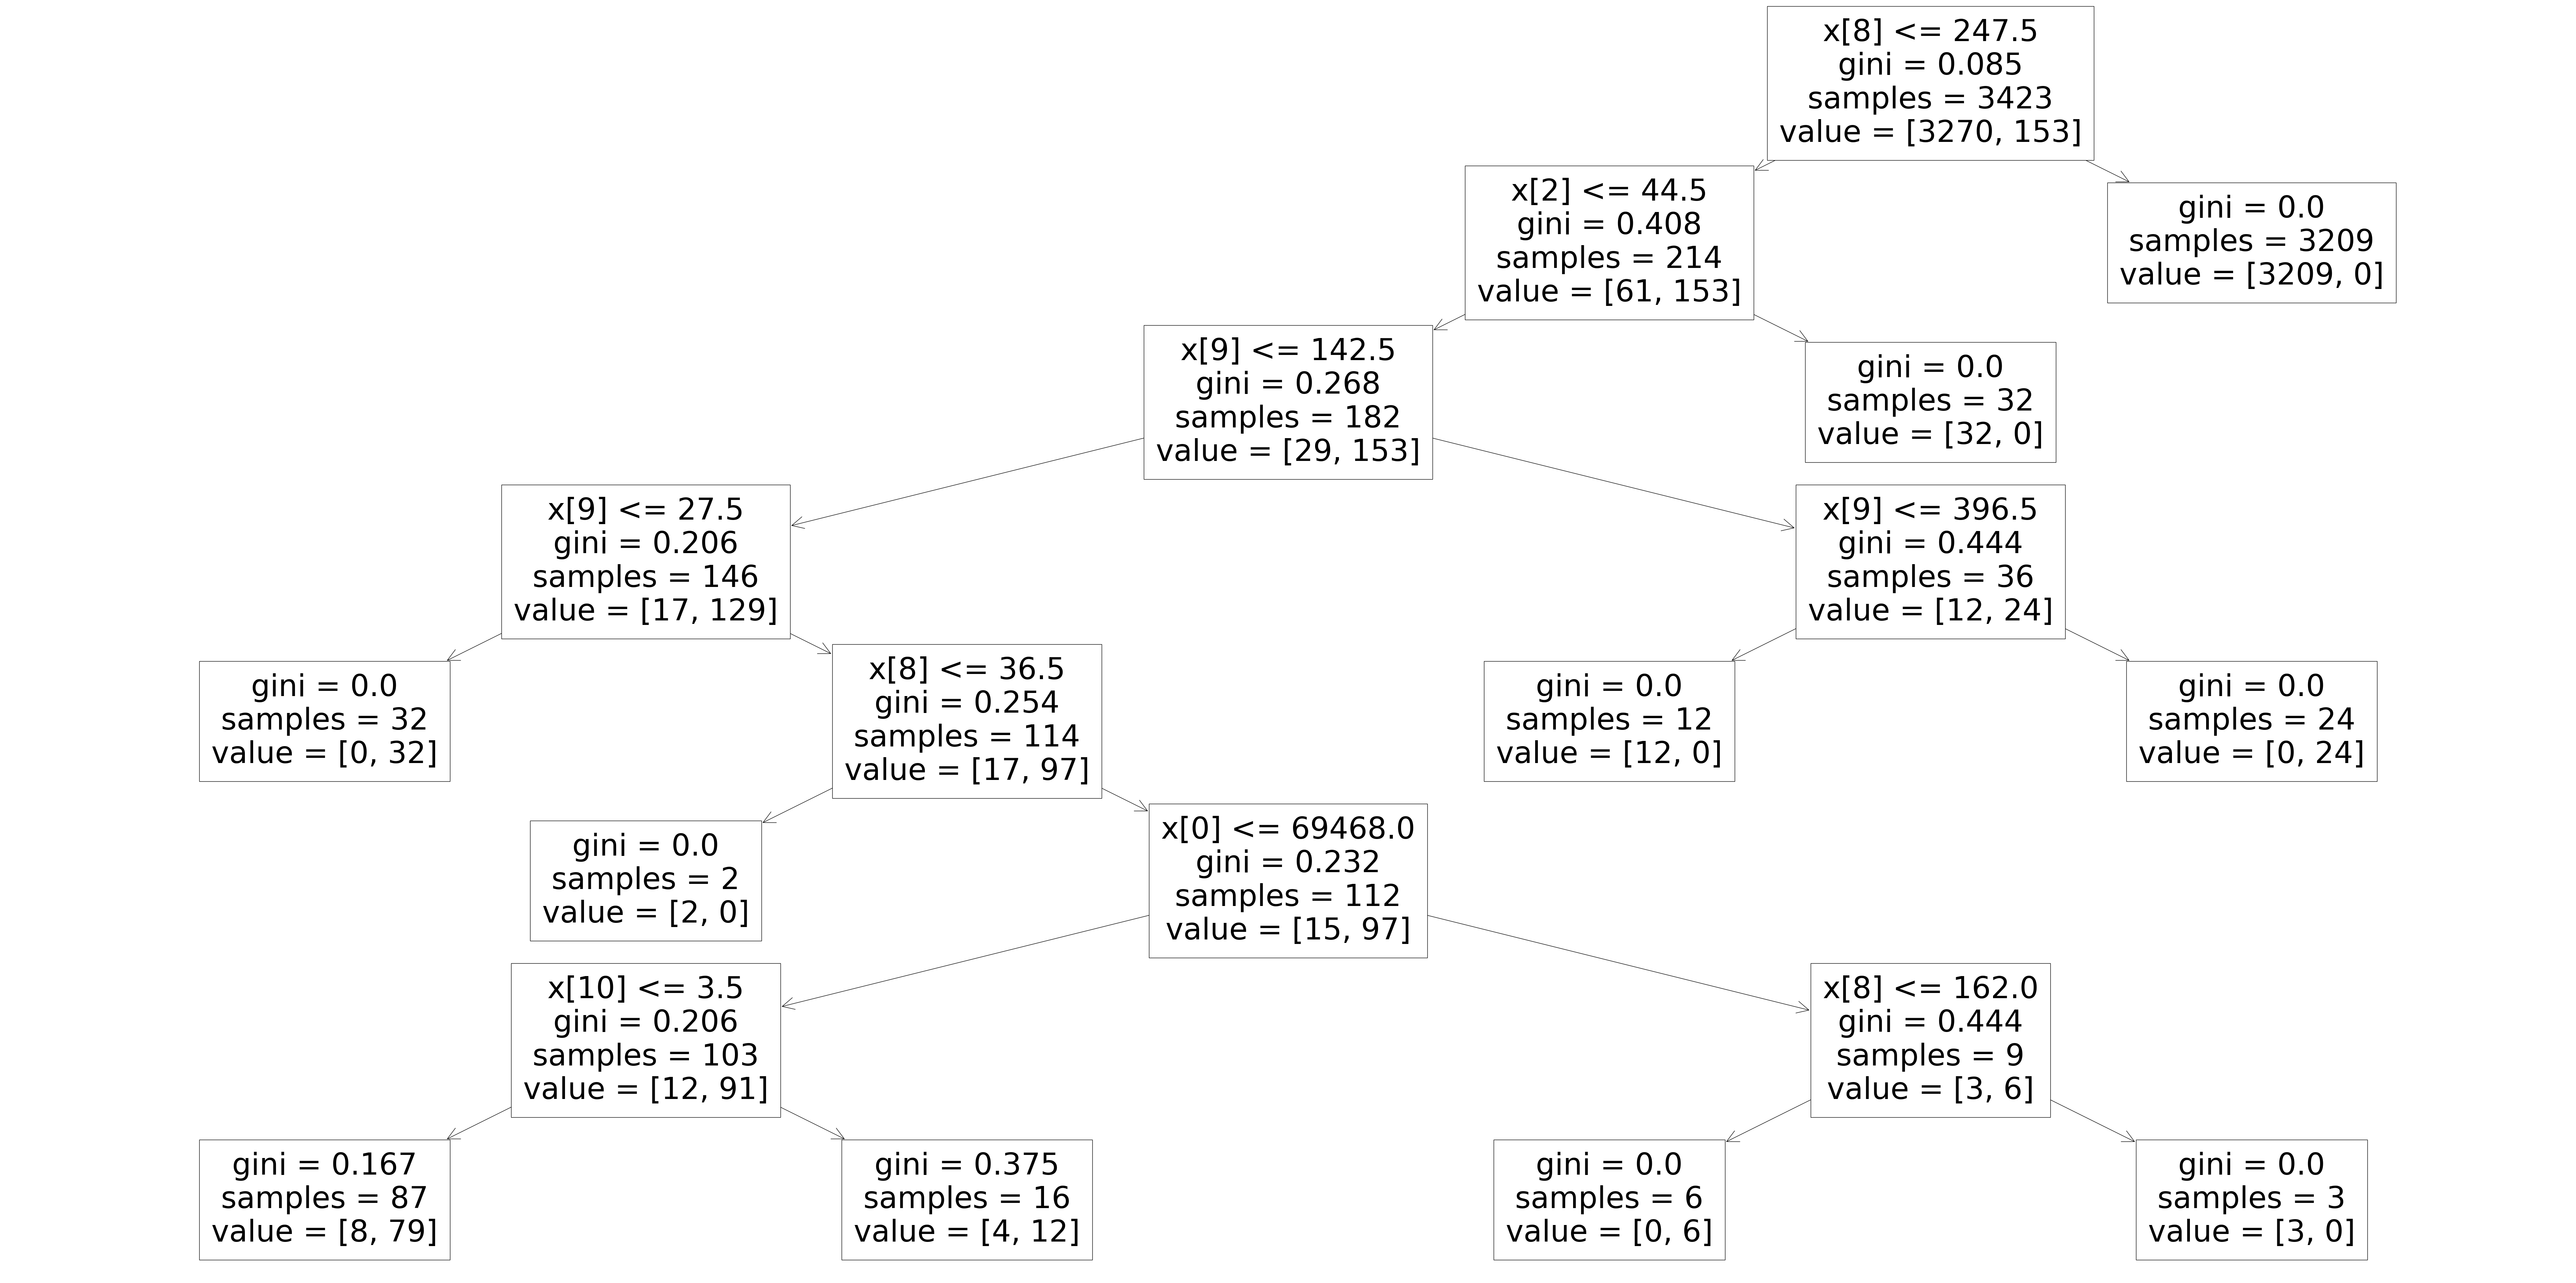

In [44]:
# plotting the splits
import matplotlib.pyplot as plt

plt.figure(figsize=(96,48))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

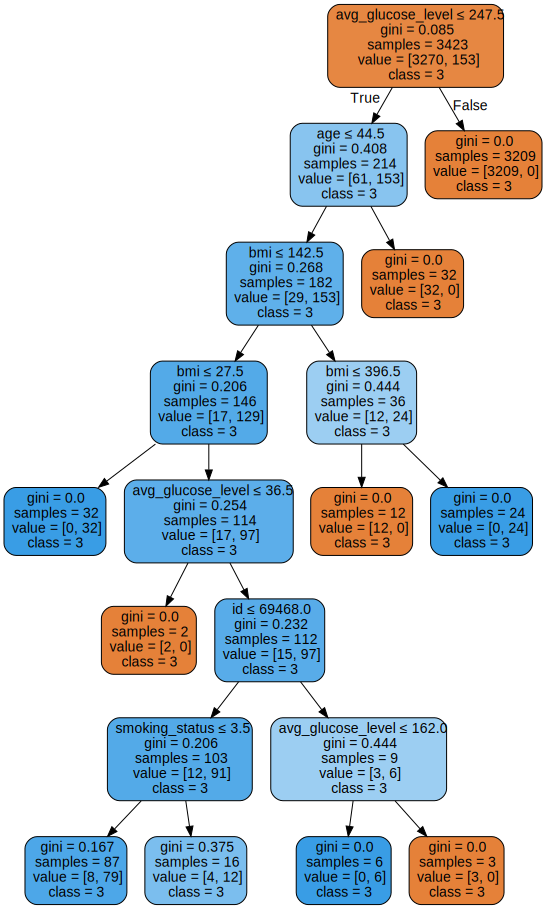

In [46]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [47]:
# Save the figure for future reference
graph.render(filename='cart',directory='/content/')

'/content/cart.pdf'

# **Evaluating the Model - CART**

We often use a metric called confusion matrix for evaluating the accuracy of a model.

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.



In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1581   10]
 [   2   94]]


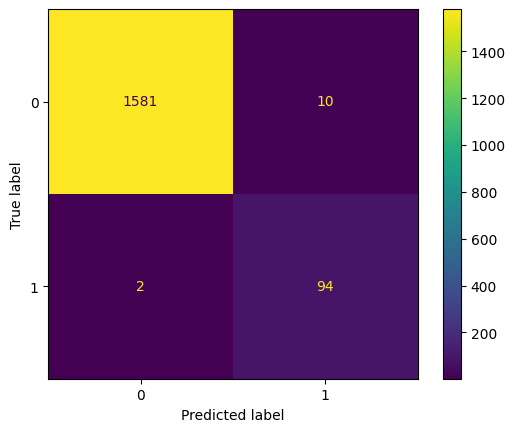

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot()

plt.savefig('/content/drive/MyDrive/CSI 382 - Datasets/cart_confusion_matrix.png')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1591
           1       0.90      0.98      0.94        96

    accuracy                           0.99      1687
   macro avg       0.95      0.99      0.97      1687
weighted avg       0.99      0.99      0.99      1687



In [51]:
# setting maximum depth of the decision tree to be level 3 with randomly chosen samples in the training set
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [52]:
# Getting some predictions from the testing set
y_pred_en = clf_en.predict(X_test)

In [53]:
# Getting some predictions from the training set
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9956


In [55]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9956
Test set score: 0.9935


[Text(0.7142857142857143, 0.9375, 'x[8] <= 247.5\nentropy = 0.263\nsamples = 3423\nvalue = [3270, 153]'),
 Text(0.5714285714285714, 0.8125, 'x[2] <= 44.5\nentropy = 0.862\nsamples = 214\nvalue = [61, 153]'),
 Text(0.42857142857142855, 0.6875, 'x[9] <= 27.5\nentropy = 0.633\nsamples = 182\nvalue = [29, 153]'),
 Text(0.2857142857142857, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.5714285714285714, 0.5625, 'x[9] <= 396.5\nentropy = 0.708\nsamples = 150\nvalue = [29, 121]'),
 Text(0.42857142857142855, 0.4375, 'x[9] <= 142.5\nentropy = 0.778\nsamples = 126\nvalue = [29, 97]'),
 Text(0.2857142857142857, 0.3125, 'x[8] <= 36.5\nentropy = 0.608\nsamples = 114\nvalue = [17, 97]'),
 Text(0.14285714285714285, 0.1875, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.42857142857142855, 0.1875, 'x[9] <= 113.0\nentropy = 0.568\nsamples = 112\nvalue = [15, 97]'),
 Text(0.2857142857142857, 0.0625, 'entropy = 0.614\nsamples = 99\nvalue = [15, 84]'),
 Text(0.5714285714285714, 0.

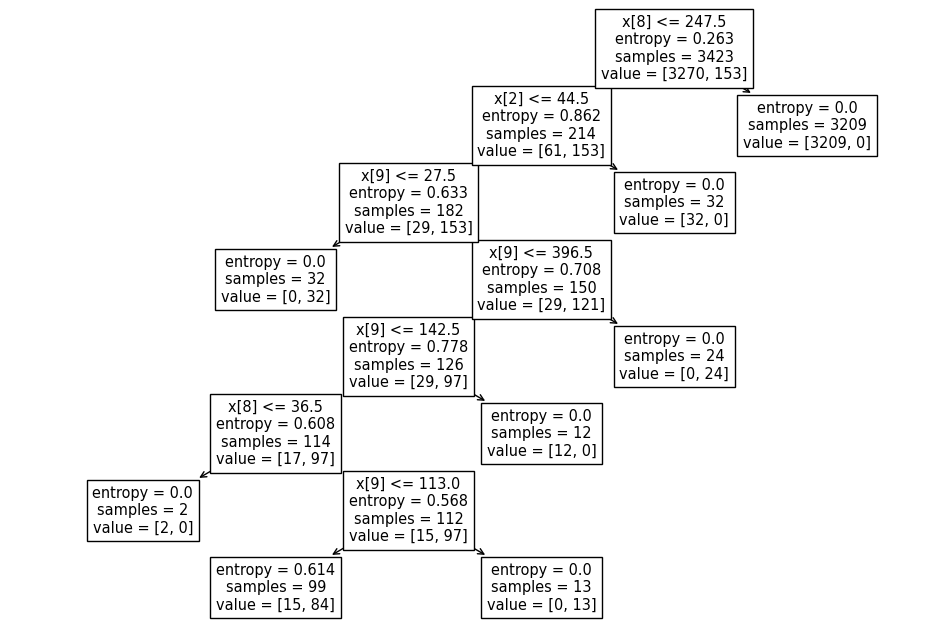

In [56]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

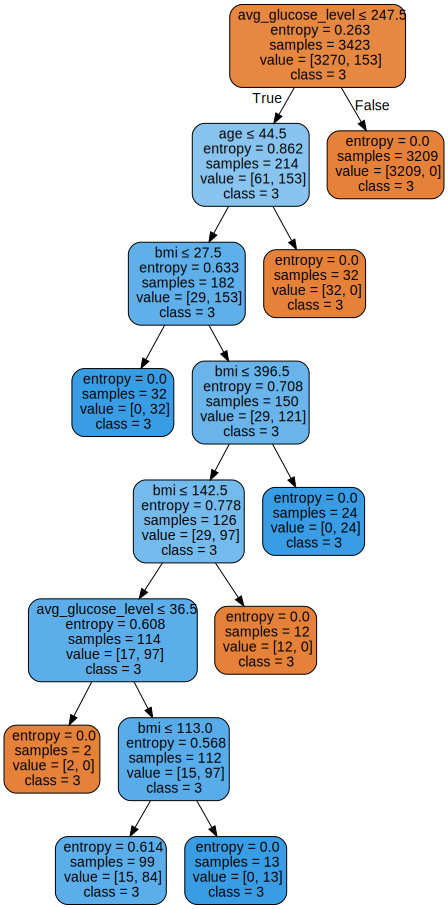

In [57]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [58]:
# Save the figure for future reference
graph.render(filename='C4.5.dot',directory='/content/drive/MyDrive/CSI 382 - Datasets/')

'/content/drive/MyDrive/CSI 382 - Datasets/C4.5.dot.pdf'

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1581   10]
 [   1   95]]


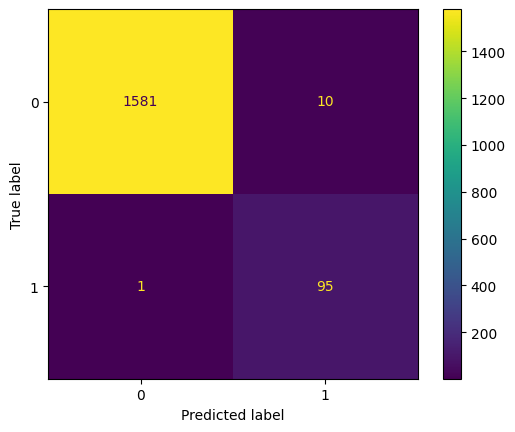

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_en.classes_)
disp.plot()

plt.savefig('/content/drive/MyDrive/CSI 382 - Datasets/cart_confusion_matrix.png')

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1591
           1       0.90      0.99      0.95        96

    accuracy                           0.99      1687
   macro avg       0.95      0.99      0.97      1687
weighted avg       0.99      0.99      0.99      1687

